### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./Untitled Folder/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time']=pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickups = df.groupby('Date/Time').count()
print(pickups)

print()
print()
print()

# Find the date with the highest number of pickups
res = pickups.max()
print('max uber pickups date:',res)
highest_pickups = pickups.max
print('RESULT:',highest_pickups)



                     Lat  Lon  Base
Date/Time                          
2014-08-01 00:00:00   23   23    23
2014-08-01 00:01:00   15   15    15
2014-08-01 00:02:00   11   11    11
2014-08-01 00:03:00   19   19    19
2014-08-01 00:04:00   13   13    13
...                  ...  ...   ...
2014-08-31 23:55:00   18   18    18
2014-08-31 23:56:00   17   17    17
2014-08-31 23:57:00   11   11    11
2014-08-31 23:58:00   17   17    17
2014-08-31 23:59:00   11   11    11

[44432 rows x 3 columns]



max uber pickups date: Lat     74
Lon     74
Base    74
dtype: int64
RESULT: <bound method NDFrame._add_numeric_operations.<locals>.max of                      Lat  Lon  Base
Date/Time                          
2014-08-01 00:00:00   23   23    23
2014-08-01 00:01:00   15   15    15
2014-08-01 00:02:00   11   11    11
2014-08-01 00:03:00   19   19    19
2014-08-01 00:04:00   13   13    13
...                  ...  ...   ...
2014-08-31 23:55:00   18   18    18
2014-08-31 23:56:00   17   17    17
2014

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [3]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
res = pickups.idxmax()
print('Date with the highest number of pickups:',res)

# Get the count of pickups on the highest date
highest_pickups = pickups.max()
print('pickups on the highest date:',highest_pickups)



Date with the highest number of pickups: Lat    2014-08-12 18:35:00
Lon    2014-08-12 18:35:00
Base   2014-08-12 18:35:00
dtype: datetime64[ns]
pickups on the highest date: Lat     74
Lon     74
Base    74
dtype: int64


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [4]:
# Count the number of unique TLC base companies
unique_c = df['Base'].nunique()
print('The number of unique TLC base companies:',unique_c)



The number of unique TLC base companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [5]:
# Group by TLC base company and count the number of pickups
pickups_company = df.groupby('Base').size()
print(pickups_company)

# Find the TLC base company with the highest number of pickups
highest_pickups_company = df.groupby('Base').size()
print(highest_pickups_company)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64
Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [6]:
# Group by TLC base company and count the number of pickups
pickups_company = df.groupby('Base').size()
print(pickups_company)


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [7]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour
print(df[['Date/Time','Hour']])

# Group by hour and count the number of pickups
pickups_hour = df.groupby(df['Hour']).size()
print(pickups_hour)

# Find the hour with the highest number of pickups
res = pickups_hour.idxmax()
print('Hour with the highest number of pickups:',res)



                 Date/Time  Hour
0      2014-08-01 00:03:00     0
1      2014-08-01 00:09:00     0
2      2014-08-01 00:12:00     0
3      2014-08-01 00:12:00     0
4      2014-08-01 00:12:00     0
...                    ...   ...
829270 2014-08-31 23:55:00    23
829271 2014-08-31 23:55:00    23
829272 2014-08-31 23:55:00    23
829273 2014-08-31 23:59:00    23
829274 2014-08-31 23:59:00    23

[829275 rows x 2 columns]
Hour
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
dtype: int64
Hour with the highest number of pickups: 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Date/Time
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
dtype: int64


Text(0, 0.5, 'Number of uber pickups')

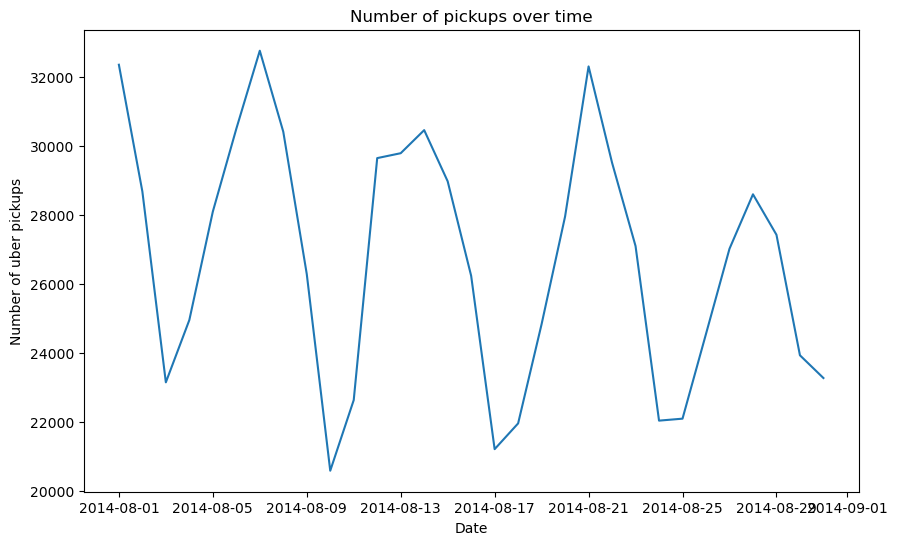

In [8]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_date = df.groupby(df['Date/Time'].dt.date).size()
print(pickups_date)

# Create a line plot to visualize the number of pickups over time
pickups_date.plot(kind='line',figsize=(10,6))
plt.title('Number of pickups over time')
plt.xlabel('Date')
plt.ylabel('Number of uber pickups')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

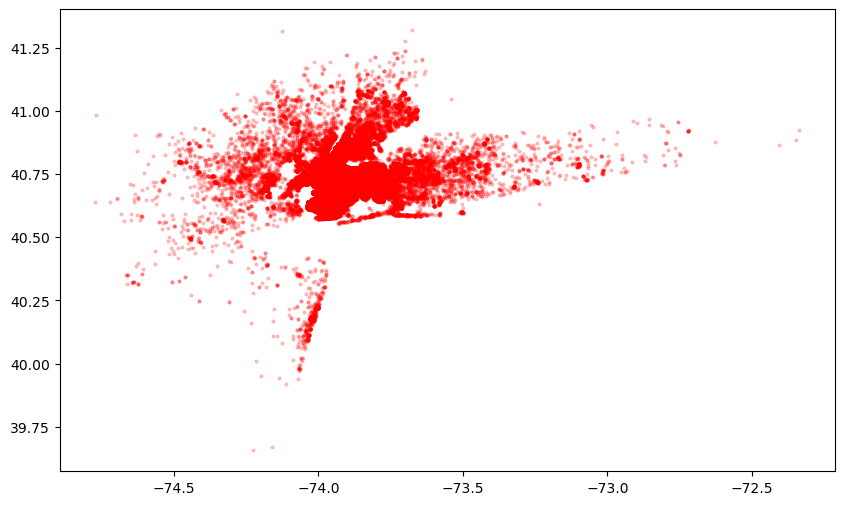

In [12]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10,6))
plt.scatter(df['Lon'],df['Lat'],s=4,alpha=0.2,color='red')

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'Number of pickups')

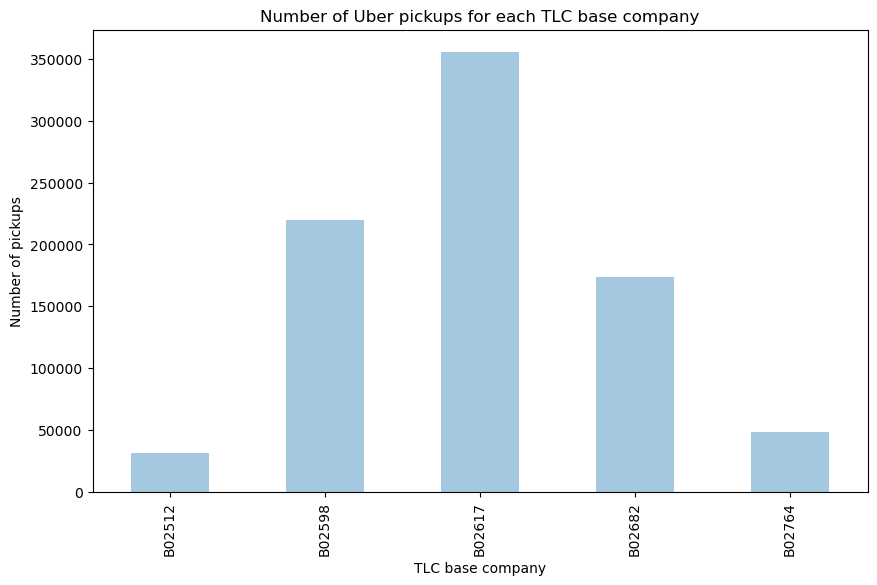

In [13]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickups_company = df.groupby('Base').size()
plt.figure(figsize=(10,6))
pickups_company.plot(kind = 'bar',alpha=0.4)
plt.title('Number of Uber pickups for each TLC base company')
plt.xlabel('TLC base company')
plt.ylabel('Number of pickups')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

pickups_day


Text(0, 0.5, ' ')

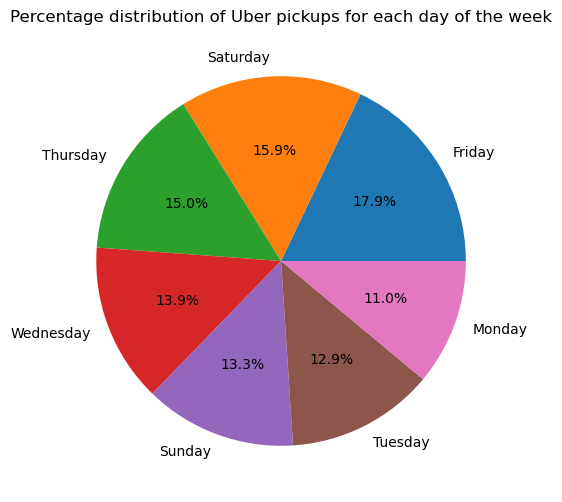

In [16]:
# Group by day of the week and count the number of pickups
pickups_day= df['Date/Time'].dt.day_name().value_counts()
print("pickups_day")

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(10,6))
pickups_day.plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage distribution of Uber pickups for each day of the week')
plt.ylabel(" ")